In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import metrics


In [8]:
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

In [9]:
true_df["label"] = 0  # Real news
fake_df["label"] = 1  # Fake news

In [10]:
df = pd.concat([true_df, fake_df]).sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
df['content'] = df[['title', 'text']].apply(lambda x: ' '.join(x.dropna()), axis=1)

In [12]:
df['content'] = df['content'].str.replace(r'\bReuters\b', '', case=False, regex=True)

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df["content"])
y = df["label"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
clf = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [16]:
y_pred = clf.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score =  metrics.f1_score(y_test, y_pred)



print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1_score)

Accuracy: 0.9865256124721603
Precision: 0.986391664894748
Recall: 0.987862010221465
F-measure: 0.9871262900308543


In [18]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.98667   0.98506   0.98587      4284
           1    0.98639   0.98786   0.98713      4696

    accuracy                        0.98653      8980
   macro avg    0.98653   0.98646   0.98650      8980
weighted avg    0.98653   0.98653   0.98653      8980



In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

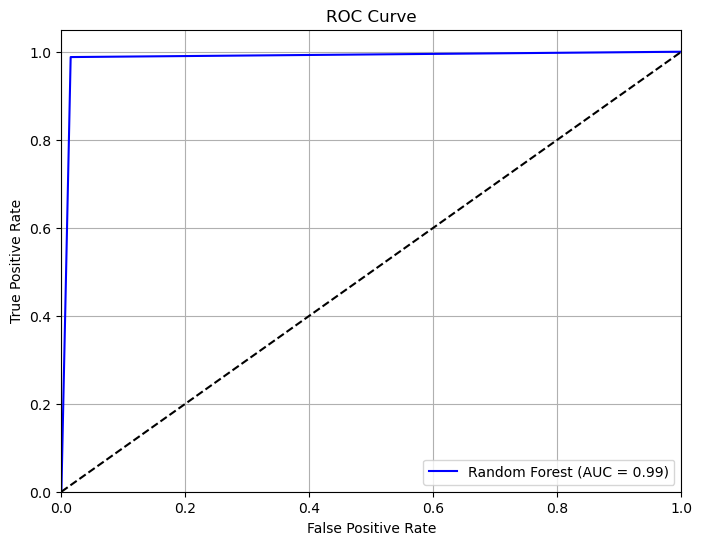

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

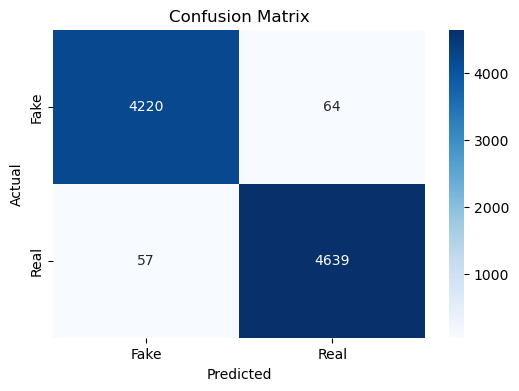

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
feature_importances = clf.feature_importances_
feature_names = vectorizer.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

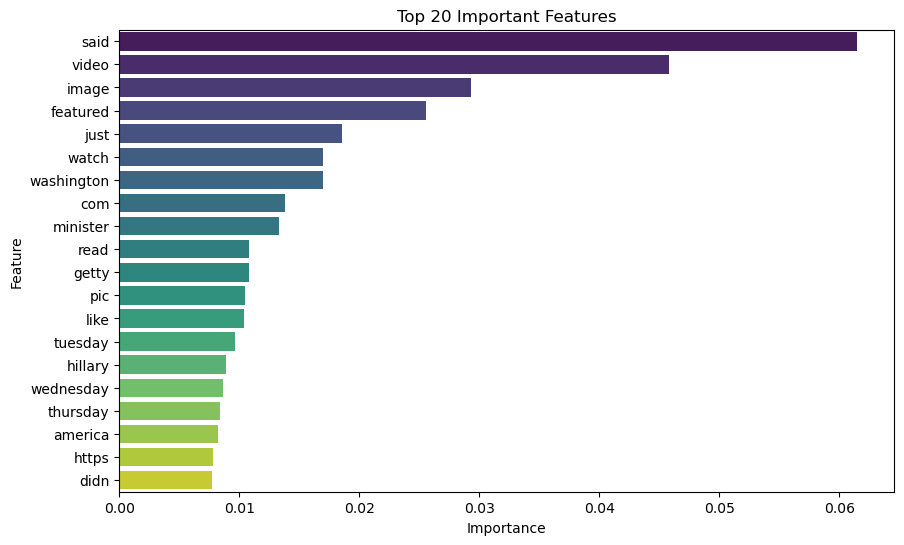

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.title("Top 20 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()